
# Step 1 - Imporing the Dataset


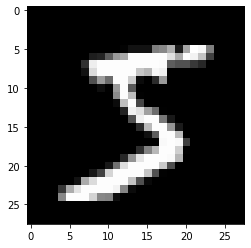

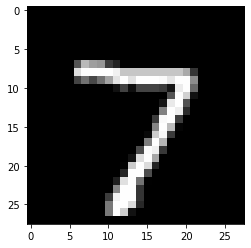

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')

def read_dataset(path):
    # Reading The Train Set
    train_images_file = open(path + 'train-images.idx3-ubyte', 'rb')
    train_images_file.seek(4)
    num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
    train_images_file.seek(16)

    train_labels_file = open(path + 'train-labels.idx1-ubyte', 'rb')
    train_labels_file.seek(8)

    train_set = []
    for n in range(num_of_train_images):
        image = np.zeros((784, 1))
        for i in range(784):
            image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
        
        label_value = int.from_bytes(train_labels_file.read(1), 'big')
        label = np.zeros((10, 1))
        label[label_value, 0] = 1
        
        train_set.append((image, label))


    # Reading The Test Set
    test_images_file = open(path + 't10k-images.idx3-ubyte', 'rb')
    test_images_file.seek(4)

    test_labels_file = open(path + 't10k-labels.idx1-ubyte', 'rb')
    test_labels_file.seek(8)

    num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
    test_images_file.seek(16)

    test_set = []
    for n in range(num_of_test_images):
        image = np.zeros((784, 1))
        for i in range(784):
            image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
        
        label_value = int.from_bytes(test_labels_file.read(1), 'big')
        label = np.zeros((10, 1))
        label[label_value, 0] = 1
        
        test_set.append((image, label))
    return train_set, test_set

train_set, test_set = read_dataset("Dataset/")
    

# Plotting an image
show_image(train_set[0][0])
plt.show()
show_image(test_set[0][0])
plt.show()

# Step 2 - Create a neural network
create a neural network with random weights and zero biases by using feedForward algorithm wthout training

In [3]:
#activation functions
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_driv(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

def activation(x, name):
    if name == "sigmoid":
        return sigmoid(x)
    elif name == "tanh":
        return tanh(x)

def activation_driv(x, name):
    if name == "sigmoid": 
        return sigmoid_driv(x)
    if name == "tanh": 
        return tanh_deriv(x)

In [5]:
%%time
layers_size = [784, 16, 16, 10]

weights = []
biases = []
# make weight matrix randomly and zero biases
for i in range(0, len(layers_size) - 1):
    weights.append(np.random.normal(size=(layers_size[i + 1], layers_size[i])))
    biases.append(np.zeros((layers_size[i + 1], 1)))

our_train_set = []
our_train_set = train_set[0:100]

#*************************** training ******************************
all_costs = []
axis= []
epoch = 20
right_predicted = 0
for ep in range(0, epoch):
    random.shuffle(our_train_set)
    mini_batch_size = 10

    batch_size = int(len(our_train_set)/mini_batch_size)
    for b in range(0, batch_size):  
        average_poach_cost = 0

        dcost_dweights = [0, 0, 0]
        dcost_dbiases = [0, 0, 0]
        for n in range(b*mini_batch_size, b*mini_batch_size + mini_batch_size):
            a = []
            y = our_train_set[n][1]
            z = []

            # feed forward
            a.append(np.array(our_train_set[n][0]))
            for i in range(0, len(layers_size) - 1):
                # print(weights[i])
                # print(a[i])
                # print(biases[i])
                neurons = sigmoid(np.matmul(weights[i], a[i]) + biases[i])
                z.append(np.matmul(weights[i], a[i]) + biases[i])
                a.append(np.array(neurons))


            
            result = np.where(a[-1] == np.amax(a[-1]))
            label = np.where(our_train_set[n][1] == np.amax(our_train_set[n][1]))
            if label[0] == result[0]:
                right_predicted = right_predicted + 1

            
    all_costs.append(average_poach_cost/len(our_train_set))
    axis.append(len(all_costs))


            
print("**********")
print("epoch : ", epoch)
print("minibatch size: ", mini_batch_size)
print("**********")
print("right predicted:",right_predicted, ", of: ", (len(our_train_set) * epoch))
print("Accuracy: %", (right_predicted/(len(our_train_set) * epoch))*100)
print("**********")



**********
epoch :  20
minibatch size:  10
**********
right predicted: 160 , of:  2000
Accuracy: % 8.0
**********
Wall time: 1.48 s


# step 3 - training network by back propagation algorithm
In this step we tried to train our network using backpropagation algorithm. We did it by a simple implementation using loops and iterating on elements.

**********
epoch :  20
minibatch size:  10
**********
right predicted: 58 , of:  400
Accuracy: % 14.499999999999998
**********


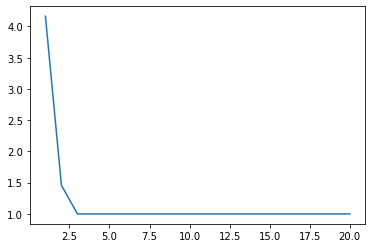

Wall time: 2min 58s


In [6]:
%%time
layers_size = [784, 16, 16, 10]
# make weight matrix randomly and zero biases
weights = []
biases = []

for i in range(0, len(layers_size) - 1):
    # matrix = []
    # for j in range(layers_size[i + 1]):
    #     row = []
    #     for k in range(layers_size[i]):
    #         row.append(random.uniform(-1, 1))
    #     matrix.append(row)
    weights.append(np.random.normal(size=(layers_size[i + 1], layers_size[i])))
    biases.append(np.zeros((layers_size[i + 1], 1)))

our_train_set = []
# for i in range(0, 100):
our_train_set = train_set[:20]

all_costs = []
axis= []
epoch = 20
right_predicted = 0
for ep in range(0, epoch):
    average_poach_cost = 0
    random.shuffle(our_train_set)
    mini_batch_size = 10
    sum_dcost_dweights = [0,0,0]
    sum_dcost_dbiases = [0,0,0]    
    
    for b in range(0, batch_size):   
        plus_n = b*mini_batch_size + mini_batch_size
        if plus_n > len(our_train_set):
            plus_n = len(our_train_set)
        for n in range(b*mini_batch_size, plus_n):
            a = []
            y = our_train_set[n][1]
            z = []
            dcost_dweights = []
            dcost_dbiases = []
            # feed forward
            a.append(np.array(our_train_set[n][0]))
            for i in range(0, len(layers_size) - 1):
                # print(weights[i])
                # print(a[i])
                # print(biases[i])
                neurons = sigmoid(np.matmul(weights[i], a[i]) + biases[i])
                z.append(np.matmul(weights[i], a[i]) + biases[i])
                a.append(np.array(neurons))

            # backpropagation
            da = []
            for l in range(len(layers_size) - 1, 0, -1):
                dw = []
                db = []
                da_temp = []
                for i in range(0, len(a[l])):
                    row_w = []
                    for j in range(0, len(a[l - 1])):
                        if l == len(layers_size) - 1:
                            cost = 2*(a[l][i]-y[i])
                        else:
                            cost = da[i]
                        temp_w = cost*sigmoid(z[l-1][i])*(1-sigmoid(z[l-1][i]))*a[l-1][j]
                        row_w.append(temp_w[0])
                    temp_b = cost*sigmoid(z[l-1][i])*(1-sigmoid(z[l-1][i]))
                    db.append(np.array(temp_b[0]))
                    dw.append(np.array(row_w))
                da_temp = []
                dcost_dweights.append(np.array(dw))
                dcost_dbiases.append(np.array(db))

                if l > 1:
                    for it in range(0, len(a[l - 1])):
                        temp = 0
                        for i in range(0, len(a[l])):
                            if l == len(layers_size) - 1:
                                a_1 = 2*(a[l][i]-y[i])
                            else:
                                # print(da[i])
                                a_1 = da[i]
                            temp += a_1*sigmoid(z[l-1][i])*(1-sigmoid(z[l-1][i]))*weights[l-1][i][it] 
                        da_temp.append(temp[0])
                    da = []
                    da = da_temp
            # print("sum_dcost_dweights: ",sum_dcost_dweights)
            sum_dcost_dweights[0] += dcost_dweights[2]
            sum_dcost_dweights[1] += dcost_dweights[1]
            sum_dcost_dweights[2] += dcost_dweights[0]

            sum_dcost_dbiases[0] += dcost_dbiases[2]
            sum_dcost_dbiases[1] += dcost_dbiases[1]
            sum_dcost_dbiases[2] += dcost_dbiases[0]

            result = np.where(a[len(layers_size) - 1] == np.amax(a[len(layers_size) - 1]))
            label = np.where(our_train_set[n][1] == np.amax(our_train_set[n][1]))
            if label[0] == result[0]:
                right_predicted = right_predicted + 1

            average_poach_cost = average_poach_cost + sum(np.power(a[-1] - our_train_set[n][1], 2))

        for i in range(0, len(layers_size) - 1):
            weights[i] = weights[i] - sum_dcost_dweights[i] / mini_batch_size
            biases[i] = biases[i] - (sum_dcost_dbiases[i] / mini_batch_size).reshape(len(sum_dcost_dbiases[i]),1)
            
    all_costs.append(average_poach_cost/len(our_train_set))
    axis.append(len(all_costs))


print("**********")
print("epoch : ", epoch)
print("minibatch size: ", mini_batch_size)
print("**********")
print("right predicted:",right_predicted, ", of: ", (len(our_train_set) * epoch))
print("Accuracy: %", (right_predicted/(len(our_train_set) * epoch))*100)
print("**********")


plt.plot(axis, all_costs)
plt.show()



# Step 4 - Vectorization
In this step we have vectorized the algorithm in order to increase the speed, by decreasing calculating time
We used numpy library and applied functions on matrices instead of using loops.
also we have updated some part of code and made it more clear and efficient

**********
epoch :  5
minibatch size:  50
**********
right predicted: 246787 , of:  300000
Accuracy: % 82.26233333333333
**********


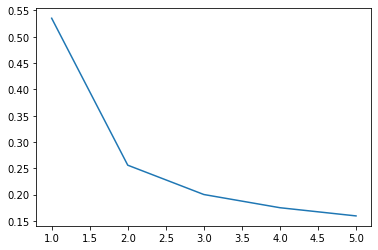

Wall time: 4min 27s


In [7]:
%%time
layers_size = [784, 16, 16, 10]

weights = []
biases = []
activation_function_name = "sigmoid"
# make weight matrix randomly and zero biases
for i in range(0, len(layers_size) - 1):
    weights.append(np.random.normal(size=(layers_size[i + 1], layers_size[i])))
    biases.append(np.zeros((layers_size[i + 1], 1)))

our_train_set = []
our_train_set = train_set

#*************************** training ******************************
all_costs = []
axis= []
epoch = 5
right_predicted = 0
for ep in range(0, epoch):
    random.shuffle(our_train_set)
    mini_batch_size = 50

    batch_size = int(len(our_train_set)/mini_batch_size)
    average_poach_cost = 0
    for b in range(0, batch_size):  

        dcost_dweights = [0, 0, 0]
        dcost_dbiases = [0, 0, 0]
        for n in range(b*mini_batch_size, b*mini_batch_size + mini_batch_size):
            a = []
            y = our_train_set[n][1]
            z = []


            # feed forward
            a.append(np.array(our_train_set[n][0]))
            for i in range(0, len(layers_size) - 1):

                z_temp = (weights[i] @ a[i]) + biases[i]
                a.append(np.array(activation(z_temp, activation_function_name)))
                z.append(z_temp)


            # backpropagation
            da = []
            for l in range(len(layers_size) - 1, 0, -1):
                da_temp = []
                xx = 0
                row_w = []
                if l == len(layers_size) - 1:
                    cost = 2*(a[l]-y)
                else:
                    cost = da

                grad_w = cost*activation_driv(z[l-1], activation_function_name)@ np.transpose(a[l-1])
                grad_b = cost*activation_driv(z[l-1], activation_function_name)

                dcost_dweights[l - 1] += grad_w
                dcost_dbiases[l - 1] += grad_b

                if l > 1:
                    if l == len(layers_size) - 1:
                        a_1 = 2*(a[l]-y)
                    else:
                        a_1 = da

                    temp = np.transpose(weights[l-1]) @ (a_1*activation_driv(z[l-1], activation_function_name))

                    da = []
                    da = temp

            # print("sum_dcost_dweights: ",sum_dcost_dweights)
           
            result = np.where(a[-1] == np.amax(a[-1]))
            label = np.where(our_train_set[n][1] == np.amax(our_train_set[n][1]))
            if label[0] == result[0]:
                right_predicted = right_predicted + 1
            average_poach_cost = average_poach_cost + sum(np.power(a[-1] - our_train_set[n][1], 2))


        #update weights and biases
        for i in range(0, len(layers_size) - 1):
            weights[i] = weights[i] - (dcost_dweights[i] / mini_batch_size)
            biases[i] = biases[i] - (dcost_dbiases[i] / mini_batch_size)
            
    all_costs.append(average_poach_cost/len(our_train_set))
    axis.append(len(all_costs))


print("**********")
print("epoch : ", epoch)
print("minibatch size: ", mini_batch_size)
print("**********")
print("right predicted:",right_predicted, ", of: ", (len(our_train_set) * epoch))
print("Accuracy: %", (right_predicted/(len(our_train_set) * epoch))*100)
print("**********")

plt.plot(axis, all_costs)
plt.show()


# Step 5 - Testing our test dataset

In [260]:
#shifting the dataset images 4 pixles to right and puting 0 in those places
def shift_img(our_dataset):
    edited_test_set = []
    edited_test_set = our_dataset
    our_edited_test_set = []
    for i in range (0, len(edited_test_set)):
        temp = np.roll(edited_test_set[i][0].reshape((28,28)) , 4)
        temp[: , 0 : 3] = 0
        our_edited_test_set_temp = []
        our_edited_test_set_temp.append(temp.reshape((784, 1)))
        our_edited_test_set_temp.append(edited_test_set[i][1])
        our_edited_test_set.append(our_edited_test_set_temp)
        
    #print a shifted image
    show_image(our_dataset[0][0])
    plt.show()
    show_image(our_edited_test_set[0][0])
    plt.show()
        
    return our_edited_test_set

In [8]:
#*************************** test ******************************
right_predicted = 0
our_test_set = []

our_test_set = test_set
# our_test_set = shift_img(test_set)

random.shuffle(our_test_set)
mini_batch_size = 1000

activation_function_name = "sigmoid"

for n in range(0, len(test_set)):
    w = []
    b = []
    a = []
    y = our_test_set[n][1]
    z = []

    # feed forward
    a.append(np.array(our_test_set[n][0]))
    for i in range(0, len(layers_size) - 1):
        z_temp = (weights[i] @ a[i]) + biases[i]
        a.append(np.array(activation(z_temp, activation_function_name)))
        z.append(z_temp)


    result = np.where(a[-1] == np.amax(a[-1]))
    # print("A: ", a[len(layers_size) - 1])
    # print('List of Indices of maximum element :', result[0])
    label = np.where(our_test_set[n][1] == np.amax(our_test_set[n][1]))
    # print(label[0])
    # print(label[0] == result[0])
    if label[0] == result[0]:
        right_predicted = right_predicted + 1

            
print("**********")
print("right predicted :",right_predicted)
print("Accuracy: %", (right_predicted/(len(test_set)))*100)
print("**********")

**********
right predicted : 9034
Accuracy: % 90.34
**********


# testing the shifted data set

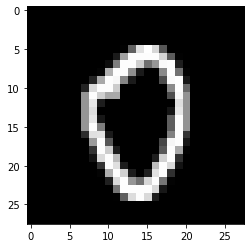

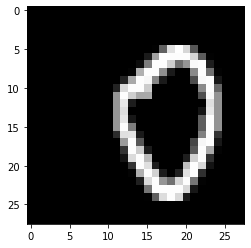

**********
right predicted : 1923
Accuracy: % 19.23
**********


In [261]:
#*************************** test ******************************
right_predicted = 0
our_test_set = []

# our_test_set = test_set
our_test_set = shift_img(test_set)

random.shuffle(our_test_set)
mini_batch_size = 1000

# activation_function_name = "sigoid"

for n in range(0, len(test_set)):
    w = []
    b = []
    a = []
    y = our_test_set[n][1]
    z = []

    # feed forward
    a.append(np.array(our_test_set[n][0]))
    for i in range(0, len(layers_size) - 1):
        z_temp = (weights[i] @ a[i]) + biases[i]
        a.append(np.array(activation(z_temp, activation_function_name)))
        z.append(z_temp)


    result = np.where(a[-1] == np.amax(a[-1]))
    # print("A: ", a[len(layers_size) - 1])
    # print('List of Indices of maximum element :', result[0])
    label = np.where(our_test_set[n][1] == np.amax(our_test_set[n][1]))
    # print(label[0])
    # print(label[0] == result[0])
    if label[0] == result[0]:
        right_predicted = right_predicted + 1

            
print("**********")
print("right predicted :",right_predicted)
print("Accuracy: %", (right_predicted/(len(test_set)))*100)
print("**********")

As we see the accuracy was reduced considerably. The reason is obvious, because we created our matrices with the pixles and we trained our network on them, so our hyperparameters are depended on the locations. for handeling this problem using CNN networks is a good way.

# Train data using tanh activation function

**********
epoch :  5
minibatch size:  50
**********
right predicted: 184642 , of:  300000
Accuracy: % 61.547333333333334
**********


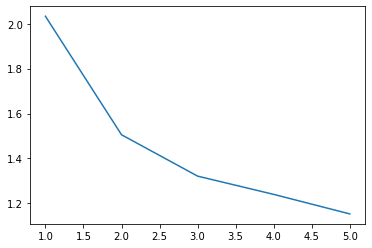

Wall time: 1min 20s


In [29]:
%%time
layers_size = [784, 16, 16, 10]

weights = []
biases = []
activation_function_name = "tanh"
# make weight matrix randomly and zero biases
for i in range(0, len(layers_size) - 1):
    weights.append(np.random.normal(size=(layers_size[i + 1], layers_size[i])))
    biases.append(np.zeros((layers_size[i + 1], 1)))

our_train_set = []
our_train_set = train_set

#*************************** training ******************************
all_costs = []
axis= []
epoch = 5
right_predicted = 0
for ep in range(0, epoch):
    random.shuffle(our_train_set)
    mini_batch_size = 50

    batch_size = int(len(our_train_set)/mini_batch_size)
    average_poach_cost = 0
    for b in range(0, batch_size):  

        dcost_dweights = [0, 0, 0]
        dcost_dbiases = [0, 0, 0]
        for n in range(b*mini_batch_size, b*mini_batch_size + mini_batch_size):
            a = []
            y = our_train_set[n][1]
            z = []


            # feed forward
            a.append(np.array(our_train_set[n][0]))
            for i in range(0, len(layers_size) - 1):

                z_temp = (weights[i] @ a[i]) + biases[i]
                a.append(np.array(activation(z_temp, activation_function_name)))
                z.append(z_temp)


            # backpropagation
            da = []
            for l in range(len(layers_size) - 1, 0, -1):
                da_temp = []
                xx = 0
                row_w = []
                if l == len(layers_size) - 1:
                    cost = 2*(a[l]-y)
                else:
                    cost = da

                grad_w = cost*activation_driv(z[l-1], activation_function_name)@ np.transpose(a[l-1])
                grad_b = cost*activation_driv(z[l-1], activation_function_name)

                dcost_dweights[l - 1] += grad_w
                dcost_dbiases[l - 1] += grad_b

                if l > 1:
                    if l == len(layers_size) - 1:
                        a_1 = 2*(a[l]-y)
                    else:
                        a_1 = da

                    temp = np.transpose(weights[l-1]) @ (a_1*activation_driv(z[l-1], activation_function_name))

                    da = []
                    da = temp

            # print("sum_dcost_dweights: ",sum_dcost_dweights)
           
            result = np.where(a[-1] == np.amax(a[-1]))
            label = np.where(our_train_set[n][1] == np.amax(our_train_set[n][1]))
            if label[0] == result[0]:
                right_predicted = right_predicted + 1
            average_poach_cost = average_poach_cost + sum(np.power(a[-1] - our_train_set[n][1], 2))


        #update weights and biases
        for i in range(0, len(layers_size) - 1):
            weights[i] = weights[i] - (dcost_dweights[i] / mini_batch_size)
            biases[i] = biases[i] - (dcost_dbiases[i] / mini_batch_size)
            
    all_costs.append(average_poach_cost/len(our_train_set))
    axis.append(len(all_costs))


print("**********")
print("epoch : ", epoch)
print("minibatch size: ", mini_batch_size)
print("**********")
print("right predicted:",right_predicted, ", of: ", (len(our_train_set) * epoch))
print("Accuracy: %", (right_predicted/(len(our_train_set) * epoch))*100)
print("**********")

plt.plot(axis, all_costs)
plt.show()


as we see training with tanh is faster that sigmoid

# Testing our test dataset using tanh activation function

In [34]:
#*************************** test ******************************
right_predicted = 0
our_test_set = []

our_test_set = test_set
# our_test_set = shift_img(test_set)

random.shuffle(our_test_set)
mini_batch_size = 1000

activation_function_name = "tanh"

for n in range(0, len(test_set)):
    w = []
    b = []
    a = []
    y = our_test_set[n][1]
    z = []

    # feed forward
    a.append(np.array(our_test_set[n][0]))
    for i in range(0, len(layers_size) - 1):
        z_temp = (weights[i] @ a[i]) + biases[i]
        a.append(np.array(activation(z_temp, activation_function_name)))
        z.append(z_temp)


    result = np.where(a[-1] == np.amax(a[-1]))
    # print("A: ", a[len(layers_size) - 1])
    # print('List of Indices of maximum element :', result[0])
    label = np.where(our_test_set[n][1] == np.amax(our_test_set[n][1]))
    # print(label[0])
    # print(label[0] == result[0])
    if label[0] == result[0]:
        right_predicted = right_predicted + 1

            
print("**********")
print("right predicted :",right_predicted)
print("Accuracy: %", (right_predicted/(len(test_set)))*100)
print("**********")

**********
right predicted : 8177
Accuracy: % 81.77
**********


As we see the accuracy when we are using tanh activation function is lower than when we used sigmoid